# Required Initialization

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy
from observable_jupyter import embed
from math import cos, sin

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import scanpy as sc

from ALLCools.clustering import significant_pc_test
from ALLCools.plot import *

# Preprocess snRNA-seq Data

## Run Intra-dataset Clustering

In [6]:
mapped_PCA_COS_clusters = pd.read_csv('mapped_PCA_COS_clusters.csv')

In [7]:
mapped_PCA_COS_clusters

,Unnamed: 0,merfish_cluster,scRNAseq_cluster,distance,Description
0,0,Leiden-0,ACNT1,0.020439,Astrocytes
1,1,Leiden-1,HBADR,0.270546,Cholinergic and monoaminergic neurons
2,2,Leiden-2,VECV,0.079359,Vascular endothelial cells
3,3,Leiden-3,MOL1,0.048439,Oligodendrocytes
4,4,Leiden-4,TEGLU8,0.139854,Telencephalon projecting excitatory neurons
5,5,Leiden-5,DEGLU3,0.194950,Di- and mesencephalon excitatory neurons
6,6,Leiden-6,MOL2,0.093751,Oligodendrocytes
7,7,Leiden-7,TEINH12,0.119142,Telencephalon inhibitory interneurons
8,8,Leiden-8,TEGLU2,0.126159,Telencephalon projecting excitatory neurons
9,9,Leiden-9,TEGLU5,0.179933,Telencephalon projecting excitatory neurons


In [7]:
adata = anndata.read_h5ad('l5_all.adata')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [8]:
adata.X.data

array([21.,  1., 14., ...,  3.,  1.,  3.], dtype=float32)

In [9]:
cell_by_gene = pd.read_csv('~/vizgen/datasets_mouse_brain_map_BrainReceptorShowcase_Slice2_Replicate1_cell_by_gene_S2R1.csv', index_col=0)

In [26]:
cell_by_gene

,Oxgr1,Htr1a,Htr1b,Htr1d,Htr1f,Htr2a,Htr2b,Htr2c,Htr4,Htr5a,Htr5b,Htr6,Htr7,Adora1,Adora2a,Adora2b,Adora3,Adgra1,Adgra2,Adgra3,Adgrb1,Adgrb3,Adgre1,Adgre4,Adgrf4,Adgrf5,Adgrl1,Adgrl2,Adgrl3,Adgrl4,Adgrd1,Adgrf1,Adgrf2,ADGRF3,Adgrg1,Adgrg2,Adgrg4,Adgrg5,Adgrg6,Adgrg7,Adgrv1,Mc2r,Adra1a,Adra1b,Adra1d,Adra2a,Adra2b,Adra2c,Aplnr,Ackr1,Ackr2,Ackr3,Ackr4,Bdkrb1,Bdkrb2,Adrb1,Adrb2,Adrb3,Brs3,Ccr1l1,Ccr1,Ccr10,Ccr2,Ccr4,Ccr6,Ccr7,Ccr8,Ccr9,Ccrl2,Cxcr1,Cxcr2,Cxcr3,Cxcr4,Cxcr5,Cxcr6,C3ar1,C5ar1,C5ar2,Celsr1,Celsr2,Celsr3,Calcrl,Calcr,Cnr1,Cnr2,Xcr1,Cmklr1,Cckar,Crhr1,Crhr2,Cx3cr1,Cysltr1,Cysltr2,Drd1,Drd5,Drd2,Drd3,Drd4,Oprd1,Ednrb,Ednra,Casr,Fpr1,Fshr,Fpr-s1,Fpr-rs3,Ffar1,Ffar3,Ffar4,Fzd1,Fzd10,Fzd2,Fzd3,Fzd4,Fzd5,Fzd6,Fzd7,Fzd8,Fzd9,Gpbar1,Gper1,Gpr1,Gpr135,Gpr143,Gpr15,Gpr157,Gpr161,Gpr176,Gpr182,Gpr183,Gpr20,Gpr22,Gpr26,Gpr3,Gpr37l1,Gpr39,Gpr4,Gpr52,Gpr55,Gpr6,Gpr61,Gpr62,Gpr84,Gpr87,Gprc5b,Gprc5c,Gprc5d,Gprc6a,Galr1,Galr2,Gabbr1,Gabbr2,Gipr,Grpr,Cckbr,Gcgr,Glp1r,Glp2r,Gpr119,Gnrhr,Ghsr,Ghrhr,Hrh1,Hrh2,Hrh3,Hrh4,Hcar1,Hcar2,Oprk1,Kiss1r,Lgr4,Lgr5,Lgr6,Ltb4r,Ltb4r2,Lhcgr,Lpar1,Lpar2,Lpar3,Lpar4,Lpar6,Mrgpra3,Mrgprb1,Mrgprb2,Mrgprb4,Mrgprb5,Mrgprb8,Mrgprd,Mrgpre,Mrgprf,Mrgprg,Mrgprh,Mrgprx2,Mchr1,Mc3r,Mc4r,Mc5r,Opn4,Mtnr1a,Mtnr1b,Gpr50,Grm1,Grm2,Grm3,Grm4,Grm5,Grm6,Grm7,Oprm1,Chrm1,Chrm2,Chrm3,Chrm4,Chrm5,Gpr18,Nmbr,Tacr3,Nmur2,Npffr2,Npsr1,Npy1r,Npy2r,Npy4r,Npy6r,Npbwr1,Ntsr1,Ntsr2,Opn3,Opn5,Hcrtr1,Hcrtr2,Oxtr,P2ry1,P2ry12,P2yr13,P2ry14,P2ry2,P2ry4,P2ry6,Pth2r,Pth1r,Adcyap1r1,Ptafr,Ccr3,Gpr101,Gpr132,Gpr139,Gpr141,Gpr142,Gpr146,Gpr149,Gpr150,Gpr151,Gpr152,Gpr153,Gpr156,Gpr158,Gpr160,Gpr162,Gpr171,Gpr173,Gpr174,Gpr21,Gpr27,Gpr33,Gpr34,Gpr45,Gpr63,Gpr75,Gpr82,Gpr83,Gpr85,Gpr88,Prokr1,Prokr2,Prlhr,Gpr37,Ptgir,Ptgdr,Ptgdr2,Ptger1,Ptger2,Ptger3,Ptger4,Ptgfr,F2r,F2rl1,F2rl2,F2rl3,Mas1,Gpr65,P2ry10,Qrfpr,Rxfp1,Rxfp2,Rxfp3,Rxfp4,Gprc5a,Rho,Sctr,Opn1sw,Smo,Sstr1,Sstr2,Sstr3,Sstr4,Sstr5,S1pr1,S1pr2,S1pr3,S1pr4,S1pr5,Tacr2,Tacr1,Sucnr1,Tas1r1,Tas1r2,Tas1r3,Tas2r135,Tas2r7,Tbxa2r,Tshr,Trhr,Taar1,Taar2,Taar3,Taar4,Taar6,Taar7a,Taar7b,Taar7d,Taar7e,Taar7f,Taar8a,Taar8b,Taar8c,Taar9,Agtr1a,Agtr1b,Agtr2,Gpr17,Uts2r,Vipr1,Vipr2,Avpr1a,Avpr1b,Avpr2,Rrh,Vmn1r40,Vmn1r42,Vmn1r43,Vmn1r44,Vmn1r45,Vmn1r46,Vmn1r47,Vmn1r49,Vmn1r50,Vmn1r51,Vmn1r52,Vmn1r53,Vmn1r54,V1ra8,Vmn2r1,Vmn2r26,Gramd3,Plxnb3,Tjap1,Cspg5,Mki67,Cenpe,Man1a,Sema4d,Tmem108,Traf4,Gjc3,Sox8,Aldh1l1,Olig1,Pcdh15,Gad1,Syt4,Baiap2,Amigo2,Slc17a6,Slc17a7,Slc17a8,Aqp4,Mlc1,Slc15a3,Selplg,Slco1a4,Fn1,Cldn5,Emcn,Myh11,Lmod1,Atp13a5,Kcnj8,Abcc9,Cd300c2,C1qa,C1qb,Cxcl12,Arhgap29,Sox9,Slc25a18,Dlk1,Peg10,Dgkk,Chat,Grin2b,Cx3cl1,Igfbpl1,Eomes,Ascl1,Slc32a1,Th,Top2a,Acte1,Ppp1r3g,Gfap,Timp4,Anxa11,Cldn19,Rspo3,Slc47a1,Pln,Foxd3,Alk,Axl,Csf1r,Ddr1,Ddr2,Efemp1,Egfr,Epha1,Epha2,Epha3,Epha4,Epha5,Epha6,Epha7,Epha8,Epha10,Ephb1,Ephb2,Ephb3,Ephb6,Erbb2,Erbb3,Erbb4,Fgfr2,Fgfr3,Fgfr4,Fgfrl1,Flt1,Flt3,Flt4,Igf1r,Insr,Insrr,Kdr,Kit,Lmtk2,Mertk,Met,Musk,Nrp1,Nrp2,Ntrk1,Ntrk2,Ntrk3,Pdgfra,Pdgfrb,Ptk7,Ret,Ror1,Ror2,Ros1,Ryk,Tek,Tie1,Tyro3,Blank-0,Blank-1,Blank-2,Blank-3,Blank-4,Blank-5,Blank-6,Blank-7,Blank-8,Blank-9,Blank-10,Blank-11,Blank-12,Blank-13,Blank-14,Blank-15,Blank-16,Blank-17,Blank-18,Blank-19,Blank-20,Blank-21,Blank-22,Blank-23,Blank-24,Blank-25,Blank-26,Blank-27,Blank-28,Blank-29,Blank-30,Blank-31,Blank-32,Blank-33,Blank-34,Blank-35,Blank-36,Blank-37,Blank-38,Blank-39,Blank-40,Blank-41,Blank-42,Blank-43,Blank-44,Blank-45,Blank-46,Blank-47,Blank-48,Blank-49,Blank-50,Blank-51,Blank-52,Blank-53,Blank-54,Blank-55,Blank-56,Blank-57,Blank-58,Blank-59,Blank-60,Blank-61,Blank-62,Blank-63,Blank-64,Blank-65,Blank-66,Blank-67,Blank-68,Blank-69,Blank-70,Blank-71,Blank-72,Blank-73,Blank-74,Blank-75,Blank-76,Blank-77,Blank-78,Blank-79,Blank-80,Blank-81,Blank-82,Blank-83,Blank-84,Blank-85,Blank-86,Blank-87,Blank-88,Blank-89,Blank-90,Blank-91,Blank-92,Blank-93,Blank-94,Blank-95,Blank-96,Blank-97,Blank-98,Blank-99,Blank-100,Blank-101,Blank-102,Blank-103,Blank-104,Blank-105,Blank-106,Blank-107,Blank-108,Blank-109,Blank-11

In [15]:
# pd.set_option("display.max_columns", None)

In [ ]:
# Preprocessing and Leiden Clustering 
#sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata.obs

# Perform Cross-Modality Integration

In [17]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
adata.var_names_make_unique()
sc.pp.scale(adata)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [18]:
adata_merfish = anndata.AnnData(cell_by_gene)
sc.pp.scale(adata_merfish)

In [19]:
adata_merge = adata.concatenate(adata_merfish, join='inner', batch_key='batch', batch_categories=['scRNA', 'MERFISH'])
adata_merge.obs_names_make_unique()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [20]:
adata_merge.obs

,Age,AnalysisPool,AnalysisProject,Bucket,CellConc,Cell_Conc,ChipID,Class,ClassProbability_Astrocyte,"ClassProbability_Astrocyte,Immune","ClassProbability_Astrocyte,Neurons","ClassProbability_Astrocyte,Oligos","ClassProbability_Astrocyte,Vascular",ClassProbability_Bergmann-glia,ClassProbability_Blood,"ClassProbability_Blood,Vascular",ClassProbability_Enteric-glia,"ClassProbability_Enteric-glia,Cycling",ClassProbability_Ependymal,ClassProbability_Ex-Neurons,ClassProbability_Ex-Vascular,ClassProbability_Immune,"ClassProbability_Immune,Neurons","ClassProbability_Immune,Oligos",ClassProbability_Neurons,"ClassProbability_Neurons,Cycling","ClassProbability_Neurons,Oligos","ClassProbability_Neurons,Satellite-glia","ClassProbability_Neurons,Vascular",ClassProbability_OEC,ClassProbability_Oligos,"ClassProbability_Oligos,Cycling","ClassProbability_Oligos,Vascular",ClassProbability_Satellite-glia,"ClassProbability_Satellite-glia,Cycling","ClassProbability_Satellite-glia,Schwann",ClassProbability_Schwann,ClassProbability_Ttr,ClassProbability_Vascular,ClusterName,Clusters,Comment,Comments,DateCaptured,Date_Captured,Description,Developmental_compartment,DonorID,Estimated Number of Cells,Flowcell,Fraction Reads in Cells,Label,LeafOrder,Location_based_on,Mean Reads per Cell,Median Genes per Cell,Median UMI Counts per Cell,MitoRiboRatio,NGI_PlateWell,Neurotransmitter,NumPooledAnimals,Num_Pooled_Animals,Number of Reads,OriginalClusters,Outliers,PCRCycles,PCR_Cycles,PassedQC,PlugDate,Plug_Date,Probable_location,Project,Q30 Bases in Barcode,Q30 Bases in RNA Read,Q30 Bases in Sample Index,Q30 Bases in UMI,Reads Mapped Confidently to Exonic Regions,Reads Mapped Confidently to Intergenic Regions,Reads Mapped Confidently to Intronic Regions,Reads Mapped Confidently to Transcriptome,Region,SampleID,SampleIndex,SampleOK,Sample_Index,SeqComment,SeqLibDate,SeqLibOk,Seq_Comment,Seq_Lib_Date,Seq_Lib_Ok,Sequencing Saturation,Serial_Number,Sex,Species,Strain,Subclass,TargetNumCells,Target_Num_Cells,TaxonomyRank1,TaxonomyRank2,TaxonomyRank3,TaxonomyRank4,TaxonomySymbol,Taxonomy_group,TimepointPool,Tissue,Total Genes Detected,Transcriptome,Valid Barcodes,_KMeans_10,_LogCV,_LogMean,_NGenes,_PC1,_PC2,_Total,_Valid,_X,_Y,_tSNE1,_tSNE2,cDNAConcNanogramPerMicroliter,cDNALibOk,cDNA_Lib_Ok,ngperul_cDNA,n_counts,batch
10X82_2_TCTCTCACCAGTTA--scRNA,"p21, p23",Enteric,Adolescent,/Users/sten/build_20171205/L4_Enteric_Neurons....,1000,1000,10X82,Neurons,0.001907,0.000481,0.002553,0.000667,0.000329,0.000602,0.002879,0.000619,0.001883,0.000474,0.002208,0.001005,0.000146,0.003505,0.000662,0.000529,0.960878,0.001113,0.004569,0.000119,0.000113,0.000127,0.004646,0.000849,0.000447,0.000320,0.000311,0.000205,0.000302,0.002193,0.003358,ENT9,0.0,Marklund cluster #1,"Wnt1 FACS (CMB), quite healthy suspension. Emu...",2017-04-06 00:00:00,2017-04-06,Cholinergic enteric neurons,Neural crest,nan,"4,374",HJJTVBBXX,67.9%,,190.0,"Vip,Cck","42,629","1,474","2,967",0.771632,,Acetylcholine,2.0,2,"186,462,928",8.0,0.0,13.0,13,OK,NaT,,Myenteric plexus of small intestine,Adolescent,98.5%,86.6%,97.1%,98.5%,60.1%,9.3%,22.9%,56.5%,Enteric nervous system,10X82_2,SI-GA-G5,,,nan,NaT,nan,,,,74.7%,321,1M 1F,Mm,Wnt1Cre-R26Rtomato-C57BL/6J,Neurons,5000,5000,Neurons,PNS neurons,Enteric neurons,Enteric neurons,Enne,Enteric neurons,nan,ENS,"18,120",mm10,98.3%,6.0,3.190891,-0.554397,4966.0,-65.275354,-6.920831,19065.0,1.0,32.193249,57.796911,-25.777197,33.125470,7.4,Y,Y,"7,4",19065.0,scRNA
10X82_2_TATTATCTACCAGA--scRNA,"p21, p23",Enteric,Adolescent,/Users/sten/build_20171205/L4_Enteric_Neurons....,1000,1000,10X82,Neurons,0.001628,0.000423,0.002343,0.000588,0.000291,0.000528,0.002528,0.000543,0.001556,0.000412,0.001714,0.000934,0.000130,0.002397,0.000597,0.000469,0.967084,0.000998,0.004322,0.000107,0.000101,0.000114,0.004021,0.000779,0.000396,0.000282,0.000272,0.000180,0.000263,0.001757,0.002243,ENT9,0.0,Marklund cluster #1,"Wnt1 FACS (CMB), quite healthy suspension. Emu...",2017-04-06 00:00:00,2017-04-06,Choli

In [21]:
sc.tl.pca(adata_merge, n_comps=100)

# choose significant components
adata_merge.obsm['X_pca_all'] = adata_merge.obsm['X_pca'].copy()
n_components = significant_pc_test(adata_merge, p_cutoff=0.1, update=False)

Downsample PC matrix to 50000 cells to calculate significant PC components
49 components passed P cutoff of 0.1.


In [22]:
# use raw counts to generate pseudo cell
adata_merge.obsm['X_pca'] = adata_merge.obsm['X_pca_all'][:, :50]

In [23]:
adata_merge.obs['batch'].value_counts()

scRNA      160796
MERFISH     83546
Name: batch, dtype: int64

In [24]:
sc.pp.neighbors(adata_merge, n_neighbors=25)
sc.tl.umap(adata_merge)

In [25]:
adata_merge.obs

,Age,AnalysisPool,AnalysisProject,Bucket,CellConc,Cell_Conc,ChipID,Class,ClassProbability_Astrocyte,"ClassProbability_Astrocyte,Immune","ClassProbability_Astrocyte,Neurons","ClassProbability_Astrocyte,Oligos","ClassProbability_Astrocyte,Vascular",ClassProbability_Bergmann-glia,ClassProbability_Blood,"ClassProbability_Blood,Vascular",ClassProbability_Enteric-glia,"ClassProbability_Enteric-glia,Cycling",ClassProbability_Ependymal,ClassProbability_Ex-Neurons,ClassProbability_Ex-Vascular,ClassProbability_Immune,"ClassProbability_Immune,Neurons","ClassProbability_Immune,Oligos",ClassProbability_Neurons,"ClassProbability_Neurons,Cycling","ClassProbability_Neurons,Oligos","ClassProbability_Neurons,Satellite-glia","ClassProbability_Neurons,Vascular",ClassProbability_OEC,ClassProbability_Oligos,"ClassProbability_Oligos,Cycling","ClassProbability_Oligos,Vascular",ClassProbability_Satellite-glia,"ClassProbability_Satellite-glia,Cycling","ClassProbability_Satellite-glia,Schwann",ClassProbability_Schwann,ClassProbability_Ttr,ClassProbability_Vascular,ClusterName,Clusters,Comment,Comments,DateCaptured,Date_Captured,Description,Developmental_compartment,DonorID,Estimated Number of Cells,Flowcell,Fraction Reads in Cells,Label,LeafOrder,Location_based_on,Mean Reads per Cell,Median Genes per Cell,Median UMI Counts per Cell,MitoRiboRatio,NGI_PlateWell,Neurotransmitter,NumPooledAnimals,Num_Pooled_Animals,Number of Reads,OriginalClusters,Outliers,PCRCycles,PCR_Cycles,PassedQC,PlugDate,Plug_Date,Probable_location,Project,Q30 Bases in Barcode,Q30 Bases in RNA Read,Q30 Bases in Sample Index,Q30 Bases in UMI,Reads Mapped Confidently to Exonic Regions,Reads Mapped Confidently to Intergenic Regions,Reads Mapped Confidently to Intronic Regions,Reads Mapped Confidently to Transcriptome,Region,SampleID,SampleIndex,SampleOK,Sample_Index,SeqComment,SeqLibDate,SeqLibOk,Seq_Comment,Seq_Lib_Date,Seq_Lib_Ok,Sequencing Saturation,Serial_Number,Sex,Species,Strain,Subclass,TargetNumCells,Target_Num_Cells,TaxonomyRank1,TaxonomyRank2,TaxonomyRank3,TaxonomyRank4,TaxonomySymbol,Taxonomy_group,TimepointPool,Tissue,Total Genes Detected,Transcriptome,Valid Barcodes,_KMeans_10,_LogCV,_LogMean,_NGenes,_PC1,_PC2,_Total,_Valid,_X,_Y,_tSNE1,_tSNE2,cDNAConcNanogramPerMicroliter,cDNALibOk,cDNA_Lib_Ok,ngperul_cDNA,n_counts,batch
10X82_2_TCTCTCACCAGTTA--scRNA,"p21, p23",Enteric,Adolescent,/Users/sten/build_20171205/L4_Enteric_Neurons....,1000,1000,10X82,Neurons,0.001907,0.000481,0.002553,0.000667,0.000329,0.000602,0.002879,0.000619,0.001883,0.000474,0.002208,0.001005,0.000146,0.003505,0.000662,0.000529,0.960878,0.001113,0.004569,0.000119,0.000113,0.000127,0.004646,0.000849,0.000447,0.000320,0.000311,0.000205,0.000302,0.002193,0.003358,ENT9,0.0,Marklund cluster #1,"Wnt1 FACS (CMB), quite healthy suspension. Emu...",2017-04-06 00:00:00,2017-04-06,Cholinergic enteric neurons,Neural crest,nan,"4,374",HJJTVBBXX,67.9%,,190.0,"Vip,Cck","42,629","1,474","2,967",0.771632,,Acetylcholine,2.0,2,"186,462,928",8.0,0.0,13.0,13,OK,NaT,,Myenteric plexus of small intestine,Adolescent,98.5%,86.6%,97.1%,98.5%,60.1%,9.3%,22.9%,56.5%,Enteric nervous system,10X82_2,SI-GA-G5,,,nan,NaT,nan,,,,74.7%,321,1M 1F,Mm,Wnt1Cre-R26Rtomato-C57BL/6J,Neurons,5000,5000,Neurons,PNS neurons,Enteric neurons,Enteric neurons,Enne,Enteric neurons,nan,ENS,"18,120",mm10,98.3%,6.0,3.190891,-0.554397,4966.0,-65.275354,-6.920831,19065.0,1.0,32.193249,57.796911,-25.777197,33.125470,7.4,Y,Y,"7,4",19065.0,scRNA
10X82_2_TATTATCTACCAGA--scRNA,"p21, p23",Enteric,Adolescent,/Users/sten/build_20171205/L4_Enteric_Neurons....,1000,1000,10X82,Neurons,0.001628,0.000423,0.002343,0.000588,0.000291,0.000528,0.002528,0.000543,0.001556,0.000412,0.001714,0.000934,0.000130,0.002397,0.000597,0.000469,0.967084,0.000998,0.004322,0.000107,0.000101,0.000114,0.004021,0.000779,0.000396,0.000282,0.000272,0.000180,0.000263,0.001757,0.002243,ENT9,0.0,Marklund cluster #1,"Wnt1 FACS (CMB), quite healthy suspension. Emu...",2017-04-06 00:00:00,2017-04-06,Choli

In [62]:
def dump_embedding(adata, name, n_dim=2):
    # put manifold coordinates into adata.obs
    for i in range(n_dim):
        adata.obs[f'{name}_{i}'] = adata.obsm[f'X_{name}'][:, i]
    return adata

In [63]:
adata_merge = dump_embedding(adata_merge, 'umap')

In [64]:
adata_merge.obsm['pc50_umap'] = adata_merge.obsm['X_umap'].copy()

In [65]:
adata_merge.obsm

AxisArrays with keys: X_pca, X_pca_all, X_umap, pc50_umap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


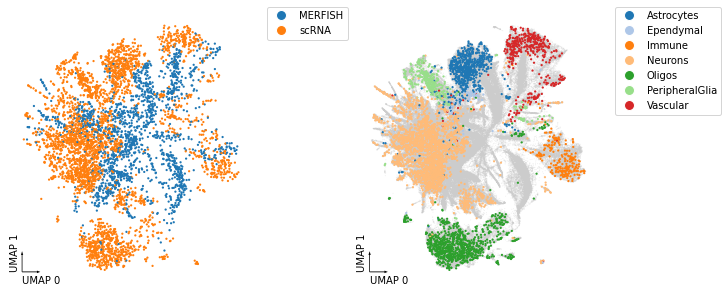

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)
ax = axes[0]
_ = categorical_scatter(data=adata_merge.obs,
                        ax=ax,
                        coord_base='umap',
                        hue='batch',
                        #text_anno='batch',
                        #palette='tab20',
                        labelsize=10,
                        show_legend=True)

ax = axes[1]
ax.scatter(adata_merge.obs['umap_0'], adata_merge.obs['umap_1'], c=(0.8,0.8,0.8), s=1, alpha=0.3, edgecolor='none', rasterized=True)
tmp = adata_merge[adata_merge.obs['batch']=='scRNA'].copy()
_ = categorical_scatter(data=tmp.obs,
                        ax=ax,
                        coord_base='umap',
                        hue='Class',
                        #text_anno='CellTypeAnno',
                        palette='tab20',
                        labelsize=10,
                        show_legend=True
                       )
                        

# Run Harmony

In [52]:
import scanpy.external as sce
sce.pp.harmony_integrate(adata_merge, 'batch', basis='X_pca', max_iter_harmony=30, random_state=0)


2021-12-07 16:55:35,227 - harmonypy - INFO - Iteration 1 of 30
2021-12-07 16:58:52,659 - harmonypy - INFO - Iteration 2 of 30
2021-12-07 17:02:43,924 - harmonypy - INFO - Iteration 3 of 30
2021-12-07 17:06:24,320 - harmonypy - INFO - Iteration 4 of 30
2021-12-07 17:08:44,867 - harmonypy - INFO - Iteration 5 of 30
2021-12-07 17:10:52,353 - harmonypy - INFO - Iteration 6 of 30
2021-12-07 17:13:11,937 - harmonypy - INFO - Iteration 7 of 30
2021-12-07 17:15:15,260 - harmonypy - INFO - Iteration 8 of 30
2021-12-07 17:17:16,585 - harmonypy - INFO - Converged after 8 iterations


In [61]:
adata_merge.write_h5ad('cell_244147_scRNA_MERFISH.h5ad')

In [56]:
sc.pp.neighbors(adata_merge, n_neighbors=25, use_rep='X_pca_harmony')
sc.tl.umap(adata_merge)

In [57]:
adata_merge = dump_embedding(adata_merge, 'umap')

In [58]:
adata_merge.obsm['pc50hm_umap'] = adata_merge.obsm['X_umap'].copy()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


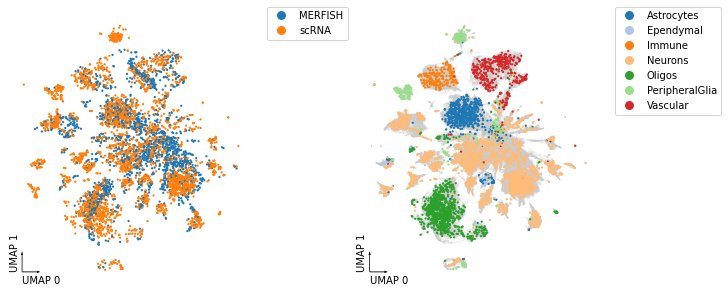

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)
ax = axes[0]
_ = categorical_scatter(data=adata_merge.obs,
                        ax=ax,
                        coord_base='umap',
                        hue='batch',
                        #text_anno='batch',
                        #palette='tab20',
                        labelsize=10,
                        show_legend=True)

ax = axes[1]
ax.scatter(adata_merge.obs['umap_0'], adata_merge.obs['umap_1'], c=(0.8,0.8,0.8), s=1, alpha=0.3, edgecolor='none', rasterized=True)
tmp = adata_merge[adata_merge.obs['batch']=='scRNA'].copy()
_ = categorical_scatter(data=tmp.obs,
                        ax=ax,
                        coord_base='umap',
                        hue='Class',
                        #text_anno='CellTypeAnno',
                        palette='tab20',
                        labelsize=10,
                        show_legend=True
                       )